![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [23]:
# Verificamos que no haya nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-53-2355a5e957f6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


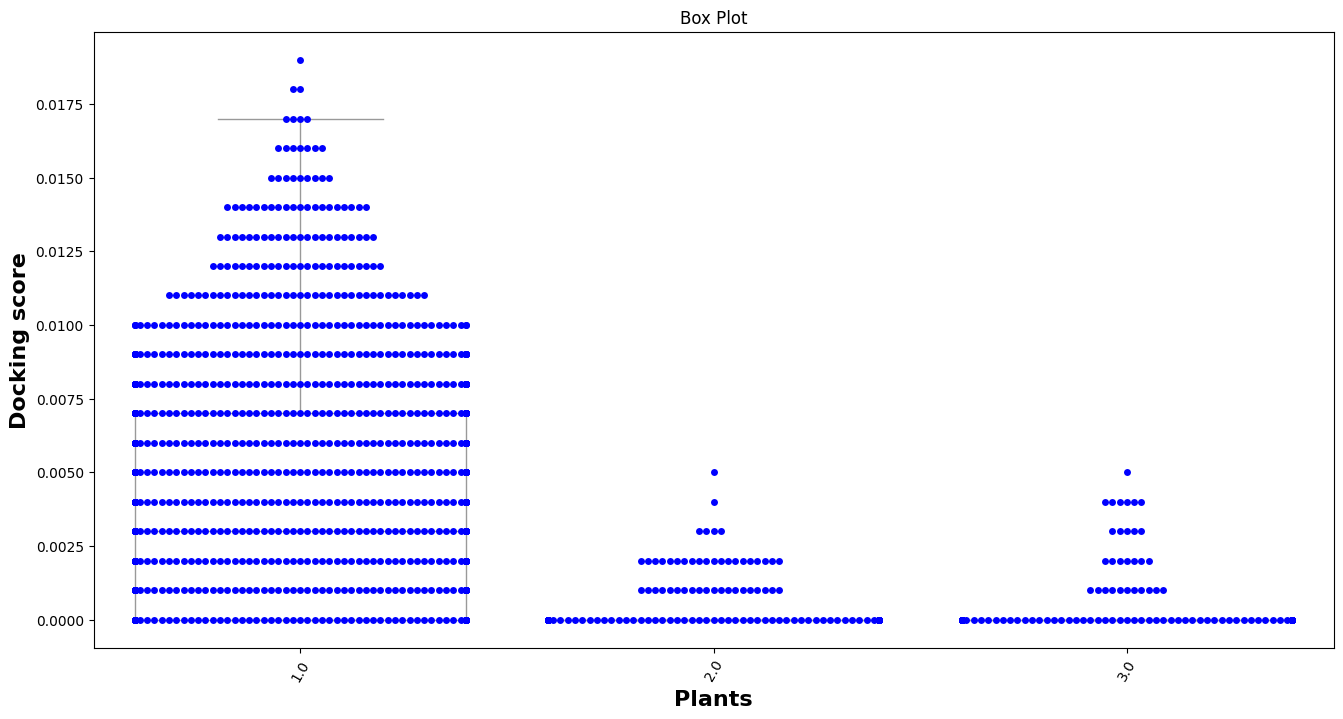

In [53]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(16, 8))

###
ax = sns.boxplot(x='fetal_health', y='accelerations', data=df, ax=fig.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='fetal_health', y='accelerations', data=df, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Plants', fontsize=16, fontweight='bold')
plt.ylabel('Docking score', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show();

In [54]:
# Definimos un dataframe con solo características
df_feat = df.drop('fetal_health',axis=1)
df_feat.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [55]:
# Definimos un dataframe con solo la variable objetivo
df_target = df['fetal_health']
df_target.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

In [27]:
# Separando un 30% para test
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=101)
y_train.head()

185     1.0
1819    1.0
87      1.0
1308    1.0
1123    1.0
Name: fetal_health, dtype: float64

Precisión: 0.9357366771159875
Matriz de confusión:
 [[489   9   3]
 [ 22  62   2]
 [  4   1  46]]


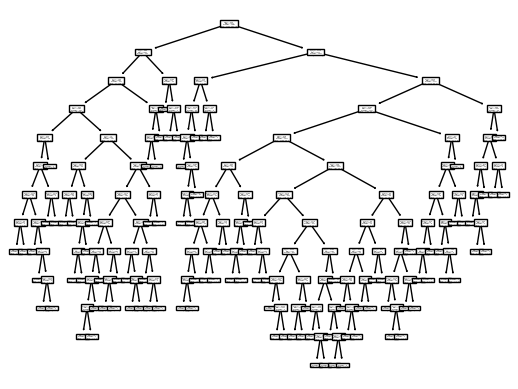

In [45]:
# Usando Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Crear modelo de árbol de decisión
model_DT = DecisionTreeClassifier(random_state=40)

# Entrenar el modelo
model_DT.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_DT.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:\n', cm)

# Visualizar el árbol
plot_tree(model_DT)
plt.show()



In [46]:
# Utilizando Random Forest
from sklearn.ensemble import RandomForestClassifier

# Crear modelo Random Forest
model_RF = RandomForestClassifier(n_estimators=100, random_state=40)

# Entrenar el modelo
model_RF.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_RF.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:\n', cm)


Precisión: 0.9561128526645768
Matriz de confusión:
 [[498   3   0]
 [ 20  64   2]
 [  2   1  48]]


In [44]:
# Usando k-vecinos
from sklearn.neighbors import KNeighborsClassifier

# Crear modelo KNN con k=3 vecinos, son 3 vecinos ya que nuestra variable tiene tres categorias
model_KN = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
model_KN.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_KN.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:\n', cm)

Precisión: 0.9028213166144201
Matriz de confusión:
 [[486  13   2]
 [ 35  50   1]
 [  7   4  40]]


In [56]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

def validacion_cruzada(modelo, X, y, k=5, verbose=True):

  # Inicializar lista para almacenar precisiones
  precisiones = []

  # Dividir los datos en k pliegues
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular la precisión
    precision = accuracy_score(y_test, y_pred)

    # Añadir precisión a la lista
    precisiones.append(precision)

    if verbose:
      print(f"Pliegue {k+1}: Precisión = {precision:.4f}")

  # Mostrar resultados generales
  if verbose:
    print(f"\nPrecisión media: {np.mean(precisiones):.4f} ± {np.std(precisiones):.4f}")

  return precisiones

In [57]:
# Modelo Random Forest
precisiones_rf = validacion_cruzada(RandomForestClassifier(n_estimators=100, random_state=40), df_feat, df_target)

# Modelo KNN
precisiones_knn = validacion_cruzada(KNeighborsClassifier(n_neighbors=3), df_feat, df_target)

# Modelo Árbol de Decisión
precisiones_dt = validacion_cruzada(DecisionTreeClassifier(random_state=40), df_feat, df_target)


KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       2113, 2115, 2116, 2117, 2119, 2120, 2121, 2122, 2124, 2125],\n      dtype='int64', length=1700)] are in the [columns]"